In [146]:
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np
import math

In [147]:
def generate_sample(n, rnd):
    return [rnd() for _ in range(n)]

In [148]:
SAMPLE_SIZE = 1000

In [149]:
def plot_dfs(distr, distr_name, my_rnd, sample_name):
    sample = generate_sample(SAMPLE_SIZE, my_rnd)
    sample.sort()
    edf = np.arange(1, len(sample) + 1) / len(sample)

    x = np.linspace(min(sample) - 1, max(sample) + 1, 200)
    y = distr.cdf(x)
    plt.plot(x, y, label=distr_name, color='red')
    plt.plot(sample, edf, label=sample_name, color='blue')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title("Функция распределения")
    plt.legend()
    plt.grid(True)
    plt.show()

    y2 = distr.pdf(x)
    plt.plot(x, y2, label=distr_name, color='red')
    plt.hist(sample, bins=35, density=True, label=sample_name, color='blue')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title("Плотность")
    plt.legend()
    plt.grid(True)
    plt.show()


In [150]:
def check_as_norm(my_rnd, smaple_name):
    plot_dfs(stats.norm, "N(0, 1)", my_rnd, smaple_name)

Зафмксируем случайную величину $$X \sim Exp(3) $$

In [151]:
lambd = 4
expon = stats.expon(scale=1 / lambd)
samples = [generate_sample(SAMPLE_SIZE, expon.rvs) for _ in range(SAMPLE_SIZE)]
ind = 0
def get_sample():
    global ind
    res = samples[ind]
    ind += 1
    if ind == len(samples):
        ind = 0
    return res
    

# Sample Mean
Проверим асимптотическую нормальность выборочного среднего

Т.к. выборочное среднее это по сути первый выборочный момент, проверим что
$$\sqrt{n} \frac{\hat{\alpha_1} - \alpha_1}{\sqrt{\alpha_2 - \alpha_1^2}} \rightarrow U \sim N(0, 1)$$

где $\hat{\alpha} = E \overline{X}$, $\alpha_k = E X^k$

То есть сгенерируем 1000 выборочных средних - по сути выборка, постоим график получившейся эмпирической фнкции распределения, убедимся что он похож на ф.р. стандартного нормального распределения


In [152]:
mean_alpha = expon.mean()
mean_sigma = np.sqrt(expon.moment(2) - mean_alpha**2)

def sample_mean_normalized():
    alpha_hat = sum(get_sample()) / SAMPLE_SIZE
    return np.sqrt(SAMPLE_SIZE) * (alpha_hat - mean_alpha) / mean_sigma

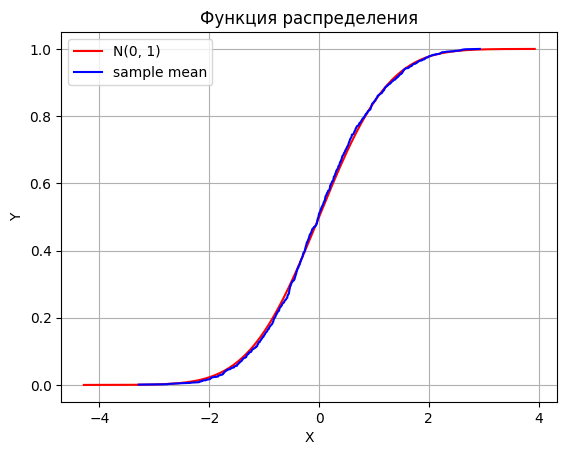

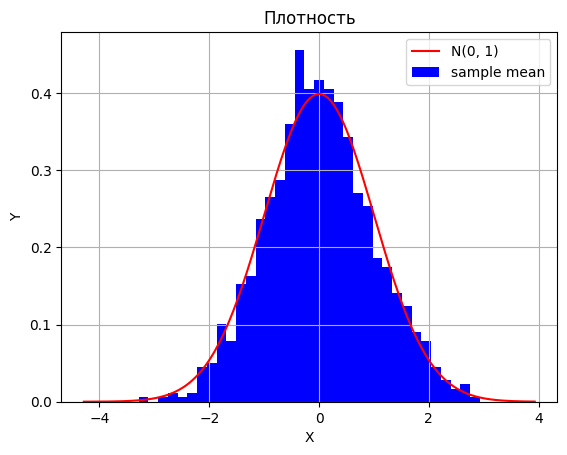

In [153]:
check_as_norm(sample_mean_normalized, "sample mean")

# Sample Variance

Проверим асимптотическую нормальность выборочной дисперсии


$S_*^2 = \hat{\beta}_2$ - выборочное среднее это по сути второй центральный выборочный момент

$E S_*^2 = \frac{n-1}{n} Var(X)$


проверим что
$$\sqrt{n} \frac{\hat{\beta}_2 - \alpha_1}{\sqrt{\beta_4 - \beta_2^2}} \rightarrow U \sim N(0, 1)$$

где $\hat{\alpha} = E \overline{X}$, $\alpha_k = E X^k$

То есть сгенерируем 1000 выборочных средних - по сути выборка, постоим график получившейся эмпирической фнкции распределения, убедимся что он похож на ф.р. стандартного нормального распределения




In [154]:
beta2 = expon.var()
beta_delim = np.sqrt(9 / lambd ** 4 - beta2 ** 2)

def sample_variance_normalized():
    sample = get_sample()
    s = sum(sample) / SAMPLE_SIZE
    beta2_hat = sum([(i - s)**2 for i in sample]) / SAMPLE_SIZE
    return np.sqrt(SAMPLE_SIZE) * (beta2_hat - beta2) / beta_delim

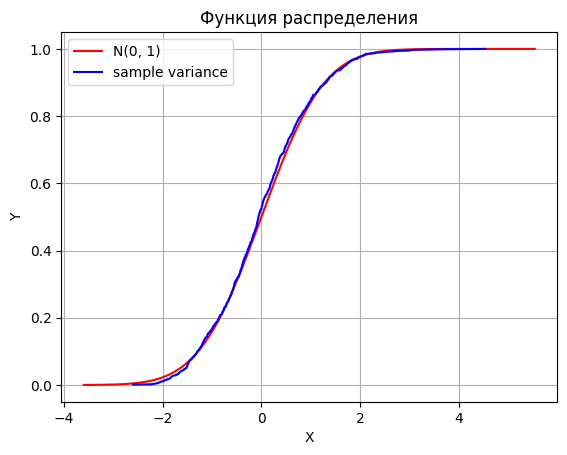

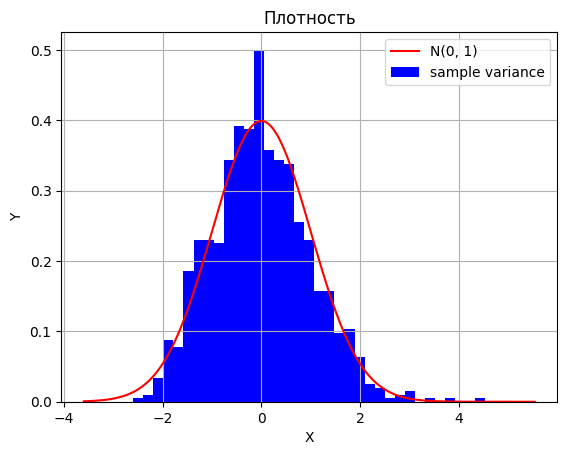

In [155]:
check_as_norm(sample_variance_normalized, "sample variance")

# SAMPLE QUANTILE 1/2

Проверим асимптотическую нормальность выборочной квантили порядка 0.5

Теоретический квантиль - $q_{p} = -\frac{\ln{(1 - p)}}{\lambda} \Rightarrow q_{0.5} = \frac{\ln{2}}{\lambda}$

Хотим проверить, что $$\sqrt{n} \frac{\hat{q}_{0.5} - q_{0.5}}{\sigma} \rightarrow U \sim N(0, 1) $$



In [156]:
p = 1/2
q_half = np.log(2) / lambd

# qvar = sum([(i - q_half)**2 for i in gen_sample(SAMPLE_SIZE, sample_quantile)])
# print(qvar)
# print(p*(1 - p)/(expon.pdf(q_half)**2))
# print(qmean)

def sample_quantile_normalized():
    sample = get_sample()
    sample.sort()
    return np.sqrt(SAMPLE_SIZE) * (sample[math.ceil(SAMPLE_SIZE * p)] - q_half) / np.sqrt(beta2)

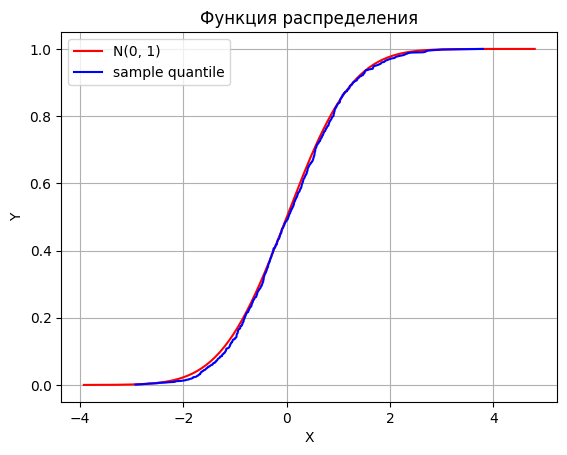

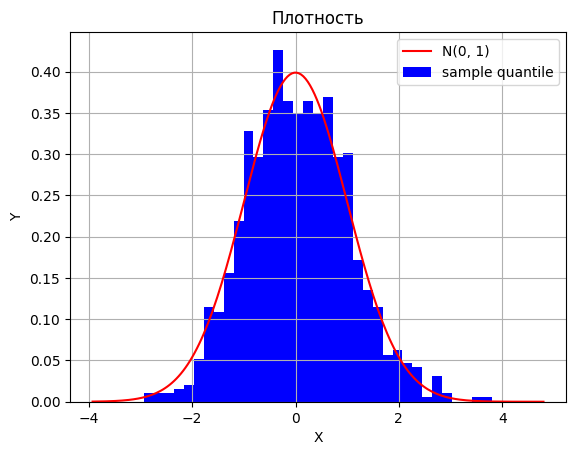

In [157]:
check_as_norm(sample_quantile_normalized, "sample quantile")

# Асимптотика крайних членов ряда

## Второй минимум

Хотим проверить, что $$n F(X_{(2)}) \rightarrow U_1 \sim \Gamma(2, 1)$$

In [158]:
def second_min():
    sample = get_sample()
    sample.sort()
    return SAMPLE_SIZE * expon.cdf(sample[1])

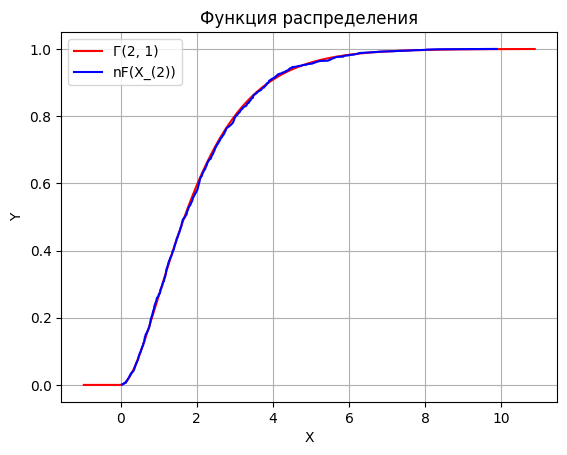

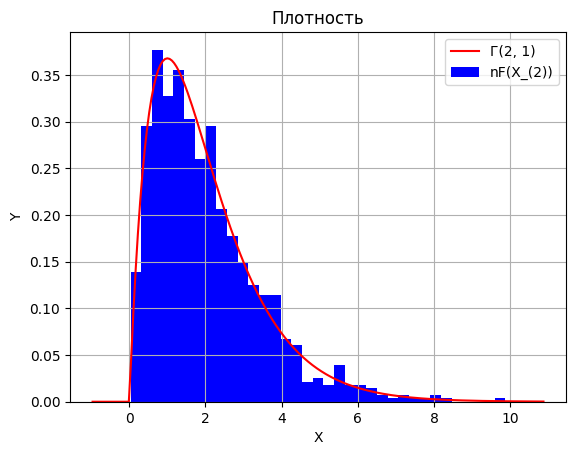

In [159]:
plot_dfs(stats.gamma(a=2), "Г(2, 1)", second_min, "nF(X_(2))")

In [160]:
def second_max():
    sample = get_sample()
    sample.sort()
    return SAMPLE_SIZE * (1 - expon.cdf(sample[-3]))

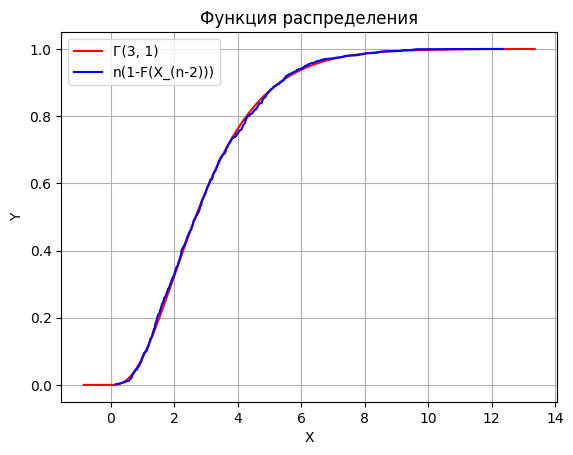

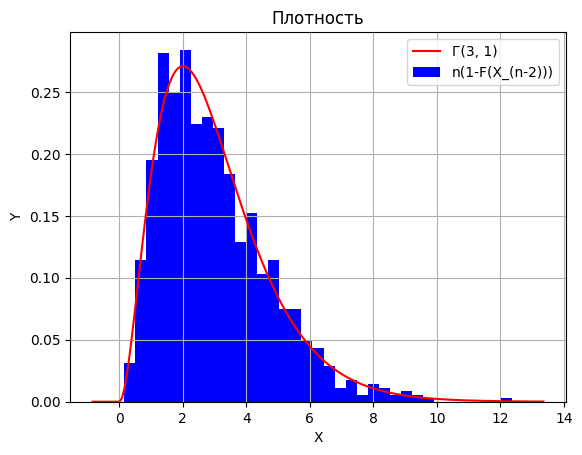

In [161]:
plot_dfs(stats.gamma(a=3), "Г(3, 1)", second_max, "n(1-F(X_(n-2)))")

Судя по графикам все распределения совпали с ожидаемыми (насколько можно судить визуально).